<a href="https://colab.research.google.com/github/khaleoghliFan/Facial-Emotion-Recognition/blob/main/face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib tensorflow opencv-python


In [2]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# upload dataset from kaggle ingoogle colab

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle


In [5]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

#upload file

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# مسیرها
train_dir = 'train'
test_dir = 'test'

# Image Generator (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#create model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  #7 class
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#train

In [11]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 116s 252ms/step - accuracy: 0.2446 - loss: 1.8251 - val_accuracy: 0.3665 - val_loss: 1.6350
Epoch 2/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 243ms/step - accuracy: 0.3340 - loss: 1.6761 - val_accuracy: 0.4076 - val_loss: 1.5376
Epoch 3/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 257ms/step - accuracy: 0.3772 - loss: 1.6046 - val_accuracy: 0.4444 - val_loss: 1.4608
Epoch 4/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 244ms/step - accuracy: 0.4013 - loss: 1.5354 - val_accuracy: 0.4607 - val_loss: 1.4053
Epoch 5/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 113s 253ms/step - accuracy: 0.4214 - loss: 1.5056 - val_accuracy: 0.4675 - val_loss: 1.3985
Epoch 6/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 138s 244ms/step - accuracy: 0.4265 - loss: 1.4872 - val_accuracy: 0.4767 - val_loss: 1.3566
Epoch 7/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 113s 251ms/step - accuracy: 0.4344 - loss: 1.4596 - val_accuracy: 0.4890 - val_loss: 1.3335
Epoch 8/15
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 244ms/step - accuracy: 0.4501 -

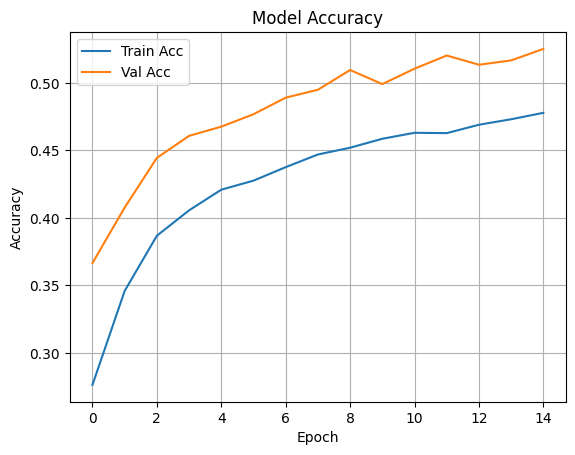

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
model.save("emotion_cnn_model.h5")


In [14]:
test_loss, test_acc = model.evaluate(test_data)
print(f"accuracy {test_acc:.2%}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.4417 - loss: 1.3675
accuracy 52.51%


#پیش بینی

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


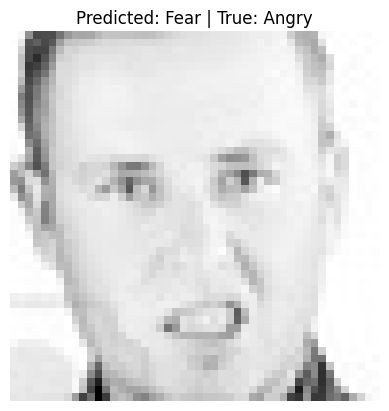

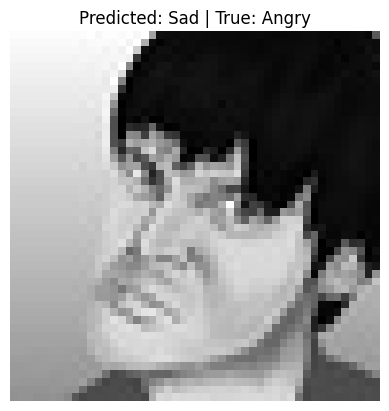

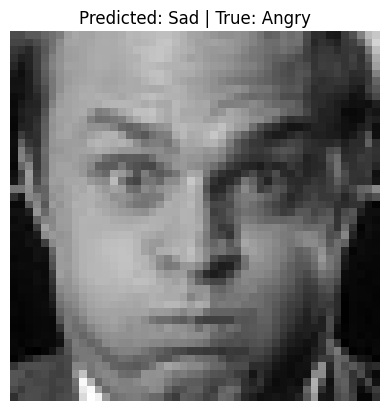

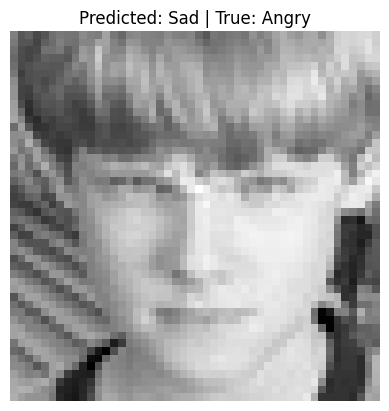

In [22]:
import numpy as np
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

images, labels = next(test_data)


predictions = model.predict(images)


import matplotlib.pyplot as plt

for i in range(1,5):
    plt.imshow(images[i].reshape(48,48), cmap='gray')
    plt.title(f"Predicted: {emotion_labels[np.argmax(predictions[i])]} | True: {emotion_labels[np.argmax(labels[i])]}")
    plt.axis('off')
    plt.show()
